# **Análisis de Popularidad, Sonoridad (Loudness), Bailabilidad (Danceability) y Speechiness de canciones de Spotify a lo largo del tiempo:**

#**INTRODUCCIÓN**

**Abstract:**

El siguiente análisis pretende estudiar las principales variables cuantitativas de canciones en Spotify, enfocándose en la popularidad, sonoridad (loudness), bailabilidad (danceability) y presencia de palabras habladas (speechiness). Se busca identificar patrones por año y por género, observar la evolución de estas características a lo largo del tiempo, y explorar qué géneros presentan mayores valores en cada variable. Además, se realiza un análisis de los tracks más populares por año para estudiar sus atributos promedio y detectar tendencias relevantes.

**Sobre el Dataset**

El dataset utilizado para la realización de este trabajo se denomina "Spotify Music Dataset", y fue descargado de manera gratuita desde la página Kaggle.

-El mismo se obtuvo a través de dos scripts de Python y busca recopilar información de la API de Spotify incluyendo tanto canciones populares como no populares.

-Posee una usabilidad de 9.41 según dicha página, y cuenta con las siguientes 23 variables: *energy, tempo, danceability, playlist_genre, loudness, liveness, valence, track_artist, time_signature, speechiness, track_popularity, track_href, uri, track_album_name, playlist_name, analysis_url, track_id, track_name, track_album_release_date, instrumentalness, track_album_id, mode, key, duration_ms, acousticness, id, playlist_subgenre, type, playlist_id*.

-Cuenta con una licencia del tipo "Database Contents License (DbCL) v1.0".

*Para más información del dataset se puede acceder al siguiente link: https://www.kaggle.com/datasets/solomonameh/spotify-music-dataset)*

## **Preguntas que se abordarán a lo largo del presente trabajo:**


1) ¿Qué géneros presentan mayor sonoridad (loudness)?
2) ¿Cuáles son los tracks más populares por año?
3) ¿Cuáles fueron los valores promedio de Danceability, Loudness y Speechiness considerando los tracks más populares de cada año?
4) ¿Qué géneros musicales presentan mayores valores promedio en Danceability, Loudness y Speechiness?

In [ ]:
# @title
# Primero importamos las herramientas que vayamos a utilizar (Pandas, Matplotlib, Numpy y Seaborn), y luego leemos los datos
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

df = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/high_popularity_spotify_data.csv")

from IPython.display import display

print("Primeras 5 filas del Dataset seleccionado:")
display(df.head(5))
print("Información sobre los tipos de variables de estudio:")
display(df.dtypes)


Primeras 5 filas del Dataset seleccionado:


,energy,tempo,danceability,playlist_genre,loudness,liveness,valence,track_artist,time_signature,speechiness,...,instrumentalness,track_album_id,mode,key,duration_ms,acousticness,id,playlist_subgenre,type,playlist_id
0,0.592,157.969,0.521,pop,-7.777,0.122,0.535,"Lady Gaga, Bruno Mars",3,0.0304,...,0.0000,10FLjwfpbxLmW8c25Xyc2N,0,6,251668,0.3080,2plbrEY59IikOBgBGLjaoe,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
1,0.507,104.978,0.747,pop,-10.171,0.117,0.438,Billie Eilish,4,0.0358,...,0.0608,7aJuG4TFXa2hmE4z1yxc3n,1,2,210373,0.2000,6dOtVTDdiauQNBQEDOtlAB,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
2,0.808,108.548,0.554,pop,-4.169,0.159,0.372,Gracie Abrams,4,0.0368,...,0.0000,0hBRqPYPXhr1RkTDG3n4Mk,1,1,166300,0.2140,7ne4VBA60CxGM75vw0EYad,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
3,0.910,112.966,0.670,pop,-4.070,0.304,0.786,Sabrina Carpenter,4,0.0634,...,0.0000,4B4Elma4nNDUyl6D5PvQkj,0,0,157280,0.0939,1d7Ptw3qYcfpdLNL5REhtJ,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M
4,0.783,149.027,0.777,pop,-4.477,0.355,0.939,"ROSÉ, Bruno Mars",4,0.2600,...,0.0000,2IYQwwgxgOIn7t3iF6ufFD,0,0,169917,0.0283,5vNRhkKd0yEAg8suGBpjeY,mainstream,audio_features,37i9dQZF1DXcBWIGoYBM5M


Información sobre los tipos de variables de estudio:


,0
energy,float64
tempo,float64
danceability,float64
playlist_genre,object
loudness,float64
liveness,float64
valence,float64
track_artist,object
time_signature,int64
speechiness,float64


**1) ¿Qué géneros presentan mayor sonoridad loudness?**

Tabla 1 - Valor del promedio y la mediana del Loudness según genero musical:



,Género,Mediana Loudness,Promedio Loudness
0,brazilian,-3.5,-3.7
1,k-pop,-3.9,-4.0
2,punk,-4.2,-4.3
3,j-pop,-4.8,-4.9
4,latin,-5.1,-5.4
5,indie,-5.2,-5.6
6,afrobeats,-5.5,-5.7
7,gaming,-5.7,-5.8
8,pop,-5.8,-6.2
9,electronic,-5.8,-6.3


 
 
 
Gráfico 1 - Distribución del nivel de loudness por género musical
 


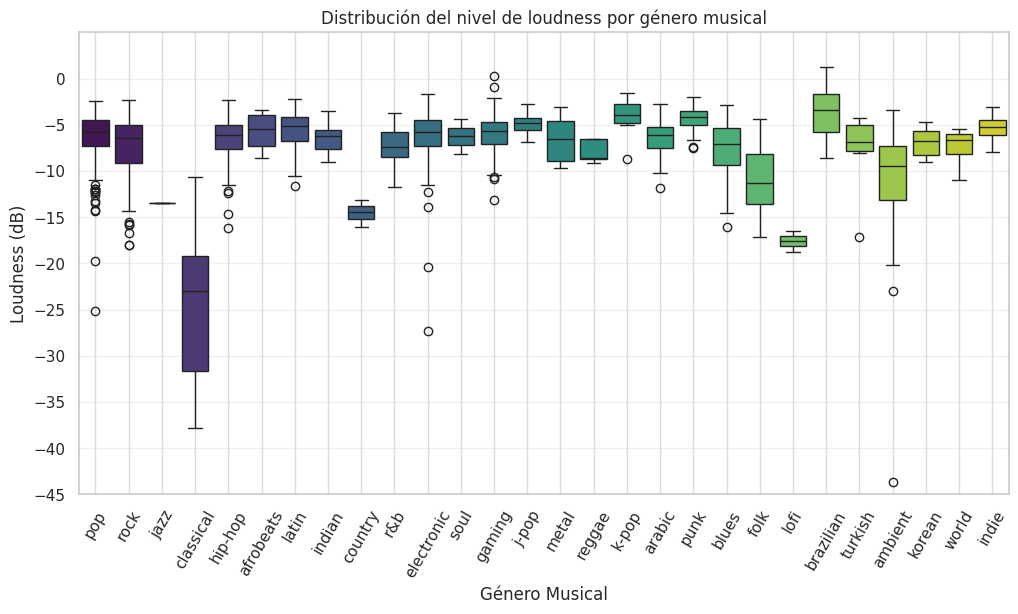

In [ ]:
# Armamos una tabla para la mediana y el promedio del Loudness para cada género
print("Tabla 1 - Valor del promedio y la mediana del Loudness según genero musical:")
print("")
tabla_resumen = pd.DataFrame({"Género": mediana_genero.index,"Mediana Loudness": mediana_genero.values,"Promedio Loudness": promedio_genero.values})
display(tabla_resumen)

#Dejo algunos espacios para mayor prolijidad
print(" ")
print(" ")
print(" ")


# @title
# Tamaño y estilo de los gráficos
plt.figure(figsize=(12,6))
sns.set(style="whitegrid", palette="muted")

# Boxplot de Loudness por Género
paleta = sns.color_palette("viridis", n_colors=df["playlist_genre"].nunique())
sns.boxplot(data=df, x="playlist_genre", y="loudness", palette=paleta, hue="playlist_genre")

# Rotación de los nombres del eje x en un valor en el que sea legible.
plt.xticks(rotation=60)

# Títulos del gráfico
plt.title("Distribución del nivel de loudness por género musical")
plt.xlabel("Género Musical", fontsize=12)   # eje X
plt.ylabel("Loudness (dB)", fontsize=12)  # eje Y

# Colocación de grids o gúias
plt.grid(axis='y', linestyle='-', alpha=0.3)  # guías horizontales (recomendado para boxplot)
plt.grid(axis='x', linestyle='-', alpha=0.7)  # guías verticales más sutiles

# Fijar rango del eje Y partiendo desde -45 de Loudness. Esta medida se tomó ya que existe un Outlier dentro del género "ambient" que incluye un valor similar. En otro caso, se habría tomado el valor inferior inmediato del último valor redondeado.
plt.ylim(-45, 5)

# Ajuste de graduación del eje Y de 5 en 5.
plt.yticks(np.arange(-45, 1, 5))

# Mostrar gráfico
print("Gráfico 1 - Distribución del nivel de loudness por género musical")
print(" ")
plt.show()




Según podemos observar en la Tabla 1, los generos que mayor nivel de loudness promedio presentaron fueron Brazilian, K-pop, Punk, J-pop, y Latin. Los generos que presentaron menor nivel de loudness en promedio fueron Folk, Jazz, Country, Lofi y Classical, siendo este último el que posee mayor nivel de loudness promedio.

En el Gráfico 1 muestra una distribución del nivel de loudness para los diferentes generos musicales. Realizando una inspeccion visual del mismo, vemos que los géneros musicales que presentaron mayor variabilidad en su nivel de loudness fueron Classic, Electronic y Ambient, habiendo en este último outliers que se alejan mucho del valor de la mediana.

**2) ¿Cuáles son los tracks más populares por año?**

In [ ]:
# @title
#Transformación de datos para unificar el formato de las fechas y poder seguir con el planteo de la pregunta 2, ya que esto estaba trayendo problemas a nivel de código.
import pandas as pd

# Cargar el CSV
df = pd.read_csv("/content/drive/My Drive/Colab_Notebooks/high_popularity_spotify_data.csv")

# Guardar la columna original como string (antes de tocar nada)
df["original_date_str"] = df["track_album_release_date"].astype(str)

# Convertir fechas completas
df["track_album_release_date"] = pd.to_datetime(df["original_date_str"], errors="coerce")

# Para filas que quedaron NaT, extraer solo el año y agregar "-01-01"
mask = df["track_album_release_date"].isna()
df.loc[mask, "track_album_release_date"] = pd.to_datetime(
    df.loc[mask, "original_date_str"].str.extract(r'(\d{4})')[0] + "-01-01",
    errors="coerce"
)

# Extraer año, mes y día
df["release_year"] = df["track_album_release_date"].dt.year.astype("Int64")
df["release_month"] = df["track_album_release_date"].dt.month.astype("Int64")
df["release_day"] = df["track_album_release_date"].dt.day.astype("Int64")

# Chequear con un temazo de RATM que estaba dando problemas de fecha
# print(df[df["track_name"] == "Killing In The Name"][["track_name", "track_album_release_date", "release_year"]])
# Funcionó, así que pasé el código a texto solo para que quede acentado.

In [ ]:
# @title
# Ordenamos por año y luego por popularidad descendente
df_sorted = df.sort_values(["release_year", "track_popularity"], ascending=[False, False])

# Seleccionamos los 10 más populares por año
top_tracks_per_year = df_sorted.groupby("release_year").head(10)

#Eliminamos dubplicados (Prueba)
top_tracks_per_year = top_tracks_per_year.drop_duplicates(
    subset=["track_name"],
    keep="first"
)

# Mostramos un preview
print("TABLA 2 - Top Tracks mas populares por año:")
print(" ")
display(top_tracks_per_year[["release_year", "track_name", "track_artist", "track_popularity"]].head(50))


TABLA 2 - Top Tracks mas populares por año:
 


,release_year,track_name,track_artist,track_popularity
0,2024,Die With A Smile,"Lady Gaga, Bruno Mars",100
4,2024,APT.,"ROSÉ, Bruno Mars",98
1,2024,BIRDS OF A FEATHER,Billie Eilish,97
5,2024,"Good Luck, Babe!",Chappell Roan,94
35,2023,Lose Control,Teddy Swims,89
711,2023,"One Of The Girls (with JENNIE, Lily Rose Depp)","The Weeknd, JENNIE, Lily-Rose Depp",89
14,2023,HOT TO GO!,Chappell Roan,88
460,2023,FE!N (feat. Playboi Carti),"Travis Scott, Playboi Carti",88
714,2023,NIGHTS LIKE THIS,The Kid LAROI,88
1416,2023,LUNA,"Feid, ATL Jacob",88


*Este dataset no contiene la variable "número de reproducciones", sino "popularity". Analizar esta variable es complejo ya que existen valores repetidos para diferentes canciones en algunos años. Esto hace que sea imposible definir una sola canción como la más popular de ese año, ya que no existen variables complementarias que puedan dar indicio de ello. Además de esto, la cantidad de canciones "populares" va variando de manera cresciente a medidad que nos acercamos al año 2024. Para resolver esto de manera parcial y sencilla, aunque roduimentaria, se decidió utilizar un máximo de "Top 10" de canciones populares para cada año. Existen formas más complejas y efectivas de mejorar el análisis estadístico de esta variable.*

**3)¿Cuáles fueron los valores promedio de Danceability, Loudness y Speechliness si consideramos a los tracks más populares de cada año?**

**3b)¿Cuales fueron los valores máximos para los promedios de las variables Danceability, Loudness y Speechliness?**



GRÁFICOS 2, 3 y 4 - Evolución del valor promedio de danceability, loudness y speechiness por año:
 


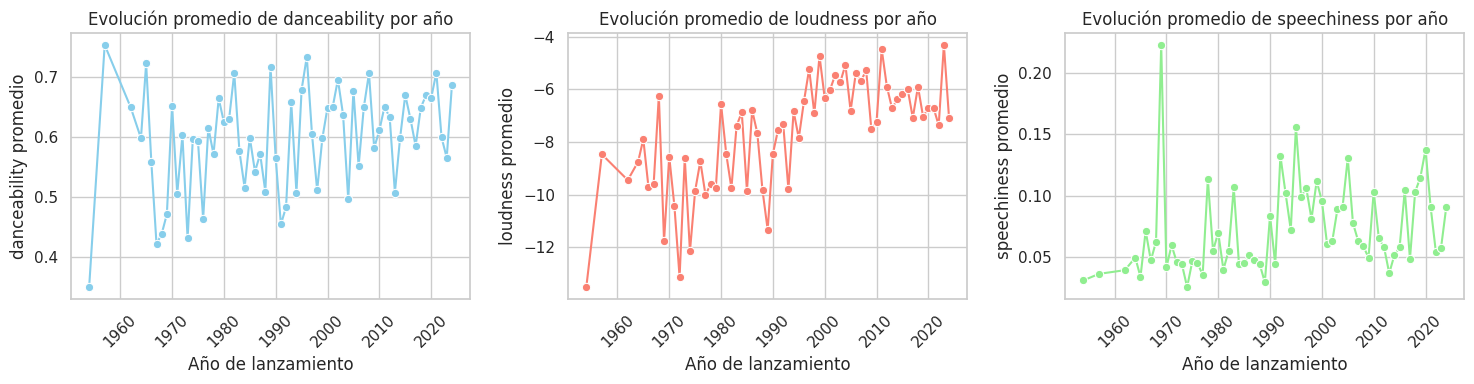

 
TABLA 3 - Valores promedio de danceability, loudness y speechiness por año
 


,release_year,danceability,loudness,speechiness
0,1954,0.35,-13.51,0.03
1,1957,0.75,-8.46,0.04
2,1962,0.65,-9.44,0.04
3,1964,0.60,-8.74,0.05
4,1965,0.72,-7.89,0.03
...,...,...,...,...
59,2020,0.67,-6.69,0.14
60,2021,0.71,-6.69,0.09
61,2022,0.60,-7.36,0.05
62,2023,0.57,-4.31,0.06


danceability: El valor promedio máximo fue de 0.75 en el año 1957
loudness: El valor promedio máximo fue de -4.31 en el año 2023
speechiness: El valor promedio máximo fue de 0.22 en el año 1969


In [ ]:
# Vamos a calcular los promedios de las canciones más escuchadas para hacer un gráfico de linea de tiempo o histograma
# Agrupamos por año y calculamos promedios
df_top_resumen = top_tracks_per_year.groupby("release_year")[["danceability", "loudness", "speechiness"]].mean().reset_index()

# Revisamos los datos
# print(df_top_resumen)

#########Como está todo correcto, podemos pasar a hacer un gráfico de líneas que refleje las 3 variables estudiadas a lo largo del tiempo########

variables = ["danceability", "loudness", "speechiness"]
colores = ["skyblue", "salmon", "lightgreen"]

print("GRÁFICOS 2, 3 y 4 - Evolución del valor promedio de danceability, loudness y speechiness por año:")
print(" ")

plt.figure(figsize=(15, 4))

for i, (var, color) in enumerate(zip(variables, colores), 1):
    plt.subplot(1, 3, i)
    sns.lineplot(data=df_top_resumen, x="release_year", y=var, marker="o", color=color)
    plt.title(f"Evolución promedio de {var} por año")
    plt.xlabel("Año de lanzamiento")
    plt.ylabel(f"{var} promedio")
    plt.xticks(rotation=45)
    plt.grid(True)


plt.tight_layout()
plt.show()
print(" ")
print("TABLA 3 - Valores promedio de danceability, loudness y speechiness por año")
print(" ")
display(df_top_resumen[["release_year", "danceability", "loudness", "speechiness"]].round(2))

#Para imprimir los valores promedios máximos de cada variable
for var in variables:
    idx_max = df_top_resumen[var].idxmax()  # índice del valor máximo
    año_max = df_top_resumen.loc[idx_max, "release_year"]
    valor_max = df_top_resumen.loc[idx_max, var]
    print(f"{var}: El valor promedio máximo fue de {valor_max:.2f} en el año {año_max}")


*Para el estudio de los gráficos 2, 3 y 4, lo ideal sería realizar una regresión lineal para estudiar si existe efectivamente un aumento neto en el valor de cada variable a lo largo del tiempo"*


Preview top 3 por año:


,release_year,track_name,track_artist,track_popularity
138,1954,Unforgettable,Nat King Cole,69
724,1957,Jingle Bell Rock,Bobby Helms,80
1222,1962,Stand By Me,Ben E. King,75
710,1964,Rockin' Around The Christmas Tree,Brenda Lee,83
65,1965,(I Can't Get No) Satisfaction - Mono Version,The Rolling Stones,76
54,1966,"Paint It, Black",The Rolling Stones,81
90,1966,For What It's Worth,Buffalo Springfield,76
124,1967,Break on Through (To the Other Side),The Doors,72
73,1968,All Along the Watchtower,Jimi Hendrix,72
83,1969,Come Together - Remastered 2009,The Beatles,75



Resumen (top3) por año — mean/median/count:
    release_year  danceability_mean  danceability_median  danceability_count  \
0           1954              0.349                0.349                   1   
1           1957              0.754                0.754                   1   
2           1962              0.650                0.650                   1   
3           1964              0.598                0.598                   1   
4           1965              0.723                0.723                   1   
..           ...                ...                  ...                 ...   
59          2020              0.442                0.357                   3   
60          2021              0.735                0.775                   3   
61          2022              0.681                0.689                   3   
62          2023              0.561                0.561                   3   
63          2024              0.521                0.521                   

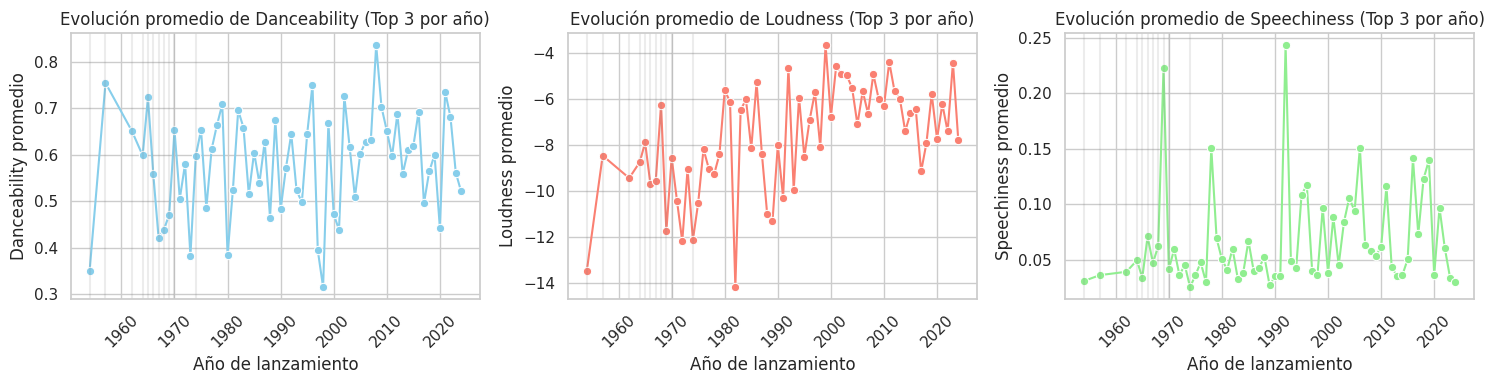


Valores máximos (media) por variable y año:
- Danceability: 0.836 en 2008
- Loudness: -3.638 en 1999
- Speechiness: 0.243 en 1992


In [ ]:
# @title
# Paso 0: librerías (si ya las cargaste antes podes omitir esta celda)
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="whitegrid", palette="muted", font_scale=1.0)

# ------------------------------
# Paso 1: ordenar y tomar top 3 por año
# ------------------------------
# Aseguramos orden por año ascendente y popularidad descendente (más lógico para análisis)
df_sorted = df.sort_values(["release_year", "track_popularity"], ascending=[True, False])

# Tomamos los primeros 3 de cada año (si un año tiene <3, toma los que existan)
top3_per_year = df_sorted.groupby("release_year").head(3).copy()   # .copy() para evitar warnings

# Vista rápida: cuántos picks por año (debería mostrar valores entre 1 y 3)
#counts = top3_per_year["release_year"].value_counts().sort_index()
#print("Número de tracks seleccionados por año (top 3):")
#print(counts)

# Mostrar un preview de los top3
print("\nPreview top 3 por año:")
display(top3_per_year[["release_year","track_name","track_artist","track_popularity"]].head(30))

# ------------------------------
# Paso 2: (opcional) limpiar filas con NA en las variables de interés
# ------------------------------
# Si hay filas donde danceability/loudness/speechiness son NaN conviene removerlas:
top3_clean = top3_per_year.dropna(subset=["danceability","loudness","speechiness"]).copy()

# Aviso si se eliminaron filas
n_removed = len(top3_per_year) - len(top3_clean)
if n_removed:
    print(f"\nSe eliminaron {n_removed} filas de top3 por tener NA en las variables musicales.")

# ------------------------------
# Paso 3: calcular promedios (y conteo) por año sobre el top3 selecionado
# ------------------------------
df_top3_resumen = (
    top3_clean
    .groupby("release_year")[["danceability","loudness","speechiness"]]
    .agg(["mean","median","count"])   # dejo mean + median + count para más info
)

# Aplanar columnas multiindex para imprimir cómodo
df_top3_resumen.columns = ["_".join(col).strip() for col in df_top3_resumen.columns.values]
df_top3_resumen = df_top3_resumen.reset_index()

# Mostrar tabla resumen redondeada
print("\nResumen (top3) por año — mean/median/count:")
print(df_top3_resumen.round(3))

# ------------------------------
# Paso 4: graficar 3 líneas separadas (una por variable), usando la media
# ------------------------------
plt.figure(figsize=(15,4))

variables = [("danceability_mean","Danceability"),
             ("loudness_mean","Loudness"),
             ("speechiness_mean","Speechiness")]
colores = ["skyblue","salmon","lightgreen"]

for i, ((col, label), color) in enumerate(zip(variables, colores), 1):
    plt.subplot(1,3,i)
    sns.lineplot(data=df_top3_resumen, x="release_year", y=col, marker="o", color=color)
    plt.title(f"Evolución promedio de {label} (Top 3 por año)")
    plt.xlabel("Año de lanzamiento")
    plt.ylabel(f"{label} promedio")
    plt.xticks(rotation=45)
    # marcar años con menos de 3 tracks (opcional)
    low_count_years = df_top3_resumen[df_top3_resumen["danceability_count"] < 3]["release_year"].tolist()
    for y in low_count_years:
        plt.axvline(x=y, color="gray", alpha=0.15)
    plt.grid(True)

plt.tight_layout()
plt.show()

# ------------------------------
# Paso 5: imprimimos los máximos por variable (valor y año)
# ------------------------------
print("\nValores máximos (media) por variable y año:")
for col in ["danceability_mean","loudness_mean","speechiness_mean"]:
    idx = df_top3_resumen[col].idxmax()
    año = int(df_top3_resumen.loc[idx,"release_year"])
    valor = df_top3_resumen.loc[idx,col]
    print(f"- {col.replace('_mean','').capitalize()}: {valor:.3f} en {año}")


**4) ¿Qué géneros musicales presentan mayores valores promedio en Danceability, Loudness y Speechiness?**

GRÁFICO 5 - Danceability promedio por género musical:
 


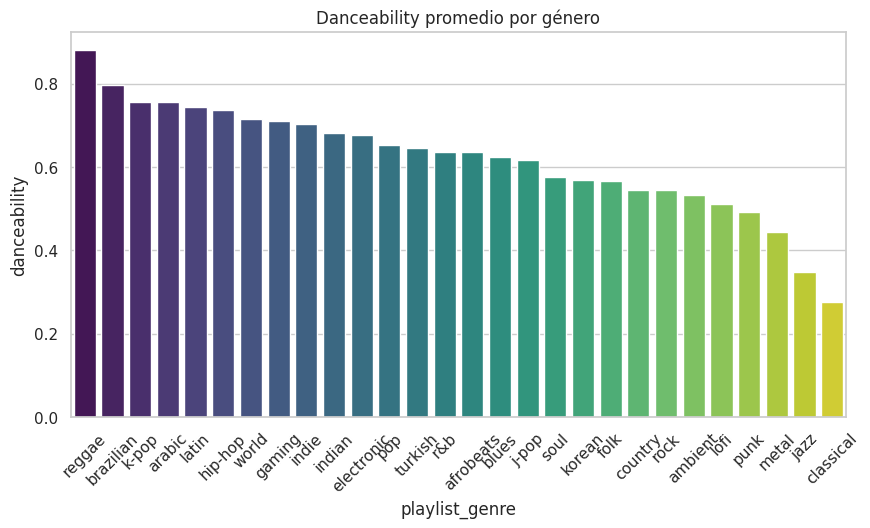

 
GRÁFICO 6 - Loudness promedio por género musical:
 


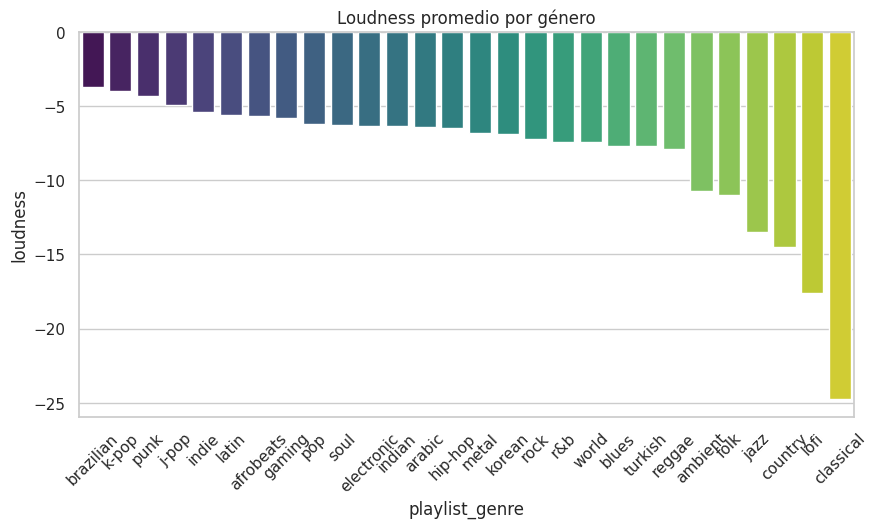

 
GRÁFICO 7 - Speechiness promedio por género musical:
 


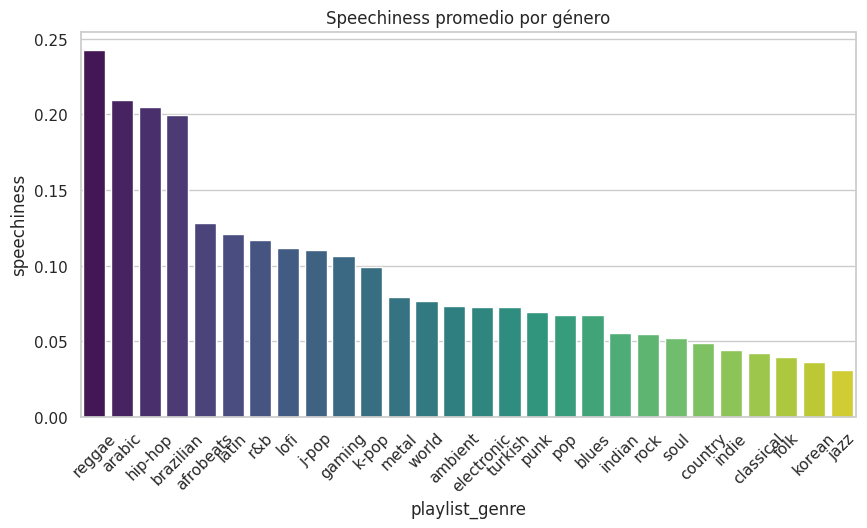

In [ ]:
# Agrupamos por género y calculamos promedios
df_genres = df.groupby("playlist_genre")[["danceability", "loudness", "speechiness"]].mean().reset_index()

# Vemos cómo quedó la tabla resumen
#display(df_genres.head())
#print(" ")

#Para Danceability
print("GRÁFICO 5 - Danceability promedio por género musical:")
print(" ")
plt.figure(figsize=(10, 5))
sns.barplot(data=df_genres.sort_values("danceability", ascending=False),
            x="playlist_genre", y="danceability", palette="viridis", hue="playlist_genre")
plt.title("Danceability promedio por género")
plt.xticks(rotation=45)
plt.show()
print(" ")

#Para Loudness
print("GRÁFICO 6 - Loudness promedio por género musical:")
print(" ")
plt.figure(figsize=(10, 5))
sns.barplot(data=df_genres.sort_values("loudness", ascending=False),
            x="playlist_genre", y="loudness", palette="viridis",hue="playlist_genre")
plt.title("Loudness promedio por género")
plt.xticks(rotation=45)
plt.show()
print(" ")

#Para Speechiness
print("GRÁFICO 7 - Speechiness promedio por género musical:")
print(" ")
plt.figure(figsize=(10, 5))
sns.barplot(data=df_genres.sort_values("speechiness", ascending=False),
            x="playlist_genre", y="speechiness", palette="viridis",hue="playlist_genre")
plt.title("Speechiness promedio por género")
plt.xticks(rotation=45)
plt.show()
print(" ")